# The 6.8 Magnitude Nisqually Earthquake on February 28, 2001 in the Pacific Northwest of the United States

The Nisqually earthquake lasted for over a minute and was one of the largest earthquakes in the area in recorded history. At least 400 people were injured and the earthquake caused billions of dollars in damage. The earthquake forced the closure of the Alaskan Way Viaduct for repairs and rebuilding to sustain a 9 magnitude earthquake event.

![image](https://upload.wikimedia.org/wikipedia/commons/7/7e/ShakeMap_for_2001_M6.8_Olympia%2C_WA_earthquake.jpg)

_This notebook will plot the earthquakes before the magnitude 6.8 mainshock on February 28, 2001 to see whether there was an unusual pattern in the days leading up to the mainshock._

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

## Search Parameters

The next code block will set the variables for our earthquake catalog search. We will look at the previous 10 years of data.

In [7]:
startt = UTCDateTime("1901-02-28")
endt = UTCDateTime("2001-02-28")
maxrad = 1.0
minmag = 2.0
lat = 47.19
lon = -122.66

## Request Data

The next code block will request the earthquake data from the IRIS catalog and assign it to a variable. 
This can take a few minutes to complete if the number of events being requested is large.

In [8]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

## Massage the Data

The data returned from the catalog needs to be changed in order to be useful to our needs. The next code block will loop over each event, and copy the times and magnitudes of the returned events into their respective lists.

In [10]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)

# Reformat the times for Matlab
mtimes = mdates.date2num(times)

## Plot the Data

The next code block generates a figure of a plot that shows the magnitude of all earthquakes in the catalog over time.

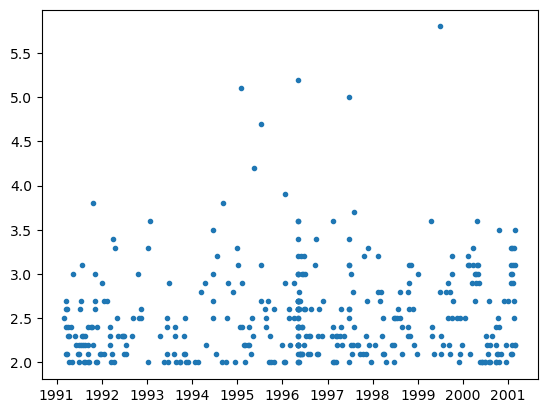

In [5]:
fig1 = plt.subplots(1,1)

plt.plot_date(mtimes,mags,'.')
plt.show()

In the weeks leading up to the February 28th earthquake, there was no unusual seismic activity in the area to indicate a high magnitude earthquake was impending.

To be thorough, we will also investigate the seismic activity closer to the event. The next code block will generate a figure of a histogram of the days preceding seismic events.

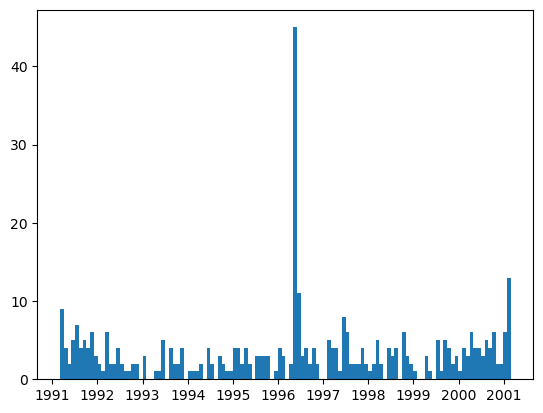

In [6]:
fig2, axes = plt.subplots(1,1)

axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In the days leading up to the February 28th earthquake, the seismicity rate was moderately high, but it has been much higher in the past 10 years without producing an earthquake greater than magnitude 6. The activity preceding the magnitude 5.3 earthquake on May 2nd, 1996 was substantially more active.

The Seattle area is an area of particular importance to seismologists interested in preventing catastrophe. Lying at the nexus of multiple fault lines, paleoseismologists believe the area is capable of producing the most devastating earthquake that has yet to come, battling the devastation caused by the magnitude-9.0 Tohoku earthquake in Japan.

Looking at the Seattle area's most devastating earthquake in recorded history, 